In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

# This Code will help to ignore version warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\MK
[nltk_data]     Jutt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("amazon/Amazon_Smartphones_Reviews.csv")

In [3]:
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [4]:
df.shape

(413840, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [9]:
df.shape

(334335, 6)

In [10]:
df['Length'] = df['Reviews'].apply(len)

In [11]:
# Filter the Samsung Reviews from the dataset
samsung_reviews = df[df['Brand Name'] == 'Samsung']

# Print the filtered DataFrame
samsung_reviews



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Length
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223
...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,30
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,2
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,43
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,92


In [21]:
print(f"Review Votes : \n{df['Review Votes'].value_counts()}")

Review Votes : 
0.0      233064
1.0       47265
2.0       19652
3.0        9634
4.0        5727
          ...  
100.0         1
264.0         1
186.0         1
142.0         1
335.0         1
Name: Review Votes, Length: 234, dtype: int64


In [12]:
df['Brand Name'].unique()

array(['Samsung', 'Nokia', 'HTM', 'Jethro', 'e passion',
       'Cedar Tree Technologies', 'Indigi', 'Phone Baby', 'OtterBox',
       'Lenovo', 'Huawei', 'JUNING', 'Elephone', 'Plum', 'VKworld',
       'NOKIA', 'Ulefone', 'Jiuhe', 'inDigi', 'Acer', 'Aeku', 'Alcatel',
       'TCL Mobile', 'LG', 'amar', 'Amazon', 'Odysseus', 'Digital SNITCH',
       'star', 'Android', 'Yezz', 'Yezz Wireless Ltd.', 'Apple',
       'Apple Computer', 'Certified Refurbished',
       'Amazon.com, LLC *** KEEP PORules ACTIVE ***', 'apple',
       'ARGOM TECH', 'Asus', 'ASUS', 'ASUS Computers', 'asus',
       'BlackBerry', 'Motorola', 'Palm', 'Pantech', 'ZTE', 'ATT', 'Atoah',
       'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
       'WorryFree Gadgets', 'worryfree', 'iDROID USA', 'Blackberry (Rim)',
       'Research In Motion', 'BLACKBERRY', 'Black Berry', 'Blackberry',
       'blackberry', 'RIM', 'Research in Motion', 'Blackberrry', 'Storm'

In [13]:
# Filter the Samsung Reviews from the dataset
apple_reviews = df[df['Brand Name'] == 'Apple']

# Print the filtered DataFrame
apple_reviews


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Length
3081,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,Was a gift for my husband and he loves it. Rep...,5.0,260
3082,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,"Great price, extremely fast shipping works as ...",1.0,57
3083,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,Moving from Android to Apple...my kids have th...,1.0,337
3084,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,It is compatible with Verizon. Not pink but PE...,0.0,174
3085,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,I love this phone! Thank you so much.,1.0,37
...,...,...,...,...,...,...,...
410273,Virgin Mobile iPhone 5 Black,Apple,289.0,5,It came as a new item. No scratches. Works per...,1.0,51
410274,Virgin Mobile iPhone 5 Black,Apple,289.0,1,"In fact, this phone could not be activated by ...",1.0,306
410275,Virgin Mobile iPhone 5 Black,Apple,289.0,5,Nice phone.,0.0,11
410276,Virgin Mobile iPhone 5 Black,Apple,289.0,2,Why Is This iPhone Locked ?? And Only Came Wit...,4.0,152


In [14]:
# Filter the Samsung Reviews from the dataset
moto_reviews = df[df['Brand Name'] == 'Motorola']

# Print the filtered DataFrame
moto_reviews

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Length
83002,AT&T Motorola RAZR V3 No Contract Quad Band GS...,Motorola,26.99,1,Not good,0.0,8
83003,AT&T Motorola RAZR V3 No Contract Quad Band GS...,Motorola,26.99,1,junk did not work got a refund,0.0,30
83004,AT&T Motorola RAZR V3 No Contract Quad Band GS...,Motorola,26.99,3,"I love the looks of it but,it has no S.D.slot....",0.0,127
83005,AT&T Motorola RAZR V3 No Contract Quad Band GS...,Motorola,26.99,4,Got phone it had no scratches but can't find w...,0.0,191
83006,AT&T Motorola RAZR V3 No Contract Quad Band GS...,Motorola,26.99,4,Works great,0.0,11
...,...,...,...,...,...,...,...
408245,Verizon or PagePlus Motorola W385 Great Condit...,Motorola,11.11,5,Gets such good reception!,0.0,25
408246,Verizon or PagePlus Motorola W385 Great Condit...,Motorola,11.11,5,This phone is the best. It cannot die. CAN NOT...,0.0,118
408247,Verizon or PagePlus Motorola W385 Great Condit...,Motorola,11.11,5,These guys really know what the are doing.. Th...,0.0,136
408248,Verizon or PagePlus Motorola W385 Great Condit...,Motorola,11.11,5,I bought this older phone for someone who like...,0.0,201


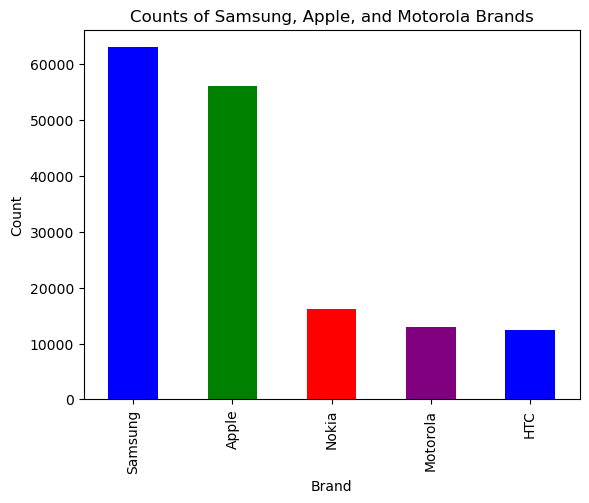

In [15]:
brand_column = 'Brand Name'

# Filter rows for Samsung, Apple, and Motorola brands
selected_brands = df[df[brand_column].isin(['Samsung', 'Apple', 'HTC', 'Motorola', 'Nokia'])]

# Create a bar plot
brand_counts = selected_brands[brand_column].value_counts()
brand_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])

# Customize the plot
plt.title('Counts of Samsung, Apple, and Motorola Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

# Show the plot
plt.show()

In [16]:
print(f"Random Review : {df.iloc[400]['Reviews']}")
print(f"Length of  Review : {len(df.iloc[400]['Reviews'])}")
print(f"Length Column Value : {df.iloc[400]['Length']}")


Random Review : Not happy with this phone. Not able to get but 1 gh on this phone. I have been with T-Mobile for 5 years and been very satisfied with their service. Because this phone is foreign, neither TMobile or ATT were able to get a faster internet. It is very slow and very often says it cant open the page and says retry. Also, the screen of the phone began cracking within a week of having it. This phone is only good for making phone calls and texting.
Length of  Review : 445
Length Column Value : 445


In [17]:
print(f"Rating Value Count :\n {df['Rating'].value_counts()}")

Rating Value Count :
 5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64


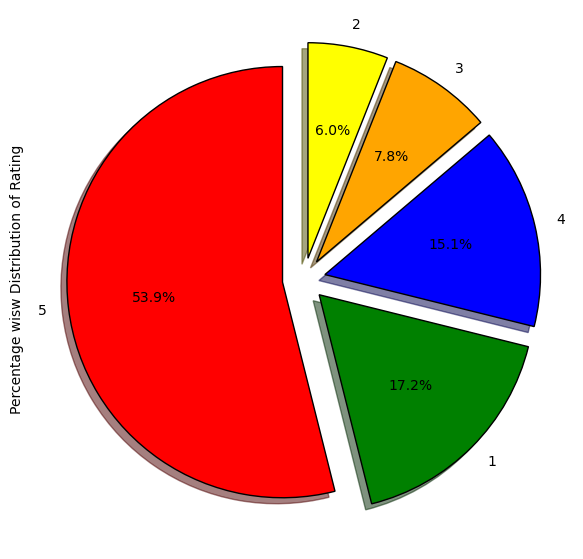

In [18]:
fig = plt.figure(figsize=(7, 7))

colors = ('red', 'green', 'blue', 'orange', 'yellow')

wp = {'linewidth':1, "edgecolor": "black"}

tags = df['Rating'].value_counts()/df.shape[0]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wisw Distribution of Rating')

from io import BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [19]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.Reviews)

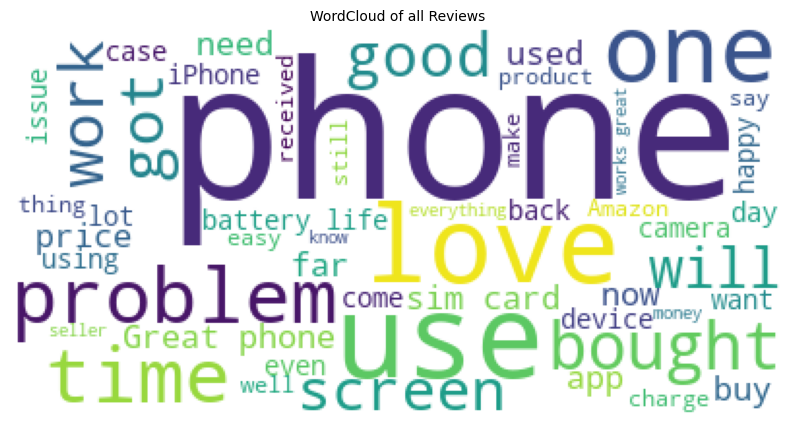

In [20]:
reviews = " ".join([review for review in df['Reviews']])

wc = WordCloud(background_color='white', max_words=50)


plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud of all Reviews', fontsize=10)
plt.axis('off')
plt.show()